<a href="https://colab.research.google.com/github/relmarrakchy/phishing-URL-detection/blob/master/phishing_detection_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing URL detection notebook
---

> Phishing URL detection involves identifying deceptive web links designed to steal sensitive information. Techniques range from analyzing URL structure for anomalies to assessing webpage content for legitimacy. Machine learning algorithms play a crucial role, scanning URLs for patterns indicative of phishing. Real-time analysis of URLs against blacklists and heuristics aids in swift identification. Regular user education on recognizing phishing attempts complements technical solutions for robust defense.

In this Python notebook, we'll try to make a Phishing URL detection model using Python libraries such as pandas, scikit-learn, and TensorFlow. Let's dive in!

## I - Importing libraries and loading the dataset :

Importing libraries :

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset :

In [6]:
dataset = pd.read_csv("../dataset/malicious_phish.csv")

dataset.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


## II - Discovering our dataset :

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


It's noted that there are no missing values in our dataset. but we have unwanted column that is *Unnamed: 0*

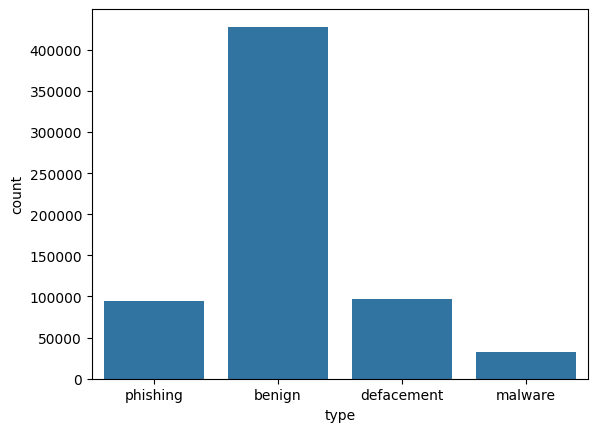

In [8]:
sns.countplot(data=dataset, x="type")
plt.show()

Let's convert the '*type*' column into a categorical data type.

In [9]:
dataset["type"] = dataset["type"].astype("category")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   url     651191 non-null  object  
 1   type    651191 non-null  category
dtypes: category(1), object(1)
memory usage: 5.6+ MB


## III - Analyzing :

In this section, I will be analyzing the URLs in our dataset and attempting to create features based on some heuristics found in an [article about phishing URLs.](https://link.springer.com/article/10.1186/s13673-016-0064-3)

Importing the necessary libraries:

In [10]:
from urllib.parse import urlparse
import string
import re

### Heuristic 1: length of the host URL

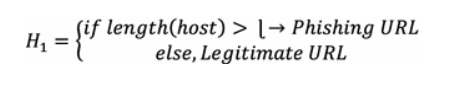

In [11]:
def host_length(url):
    parsed_url = urlparse(url)
    return len(parsed_url.netloc)

dataset["host length"] = dataset["url"].apply(host_length)

### Heuristics 2: number of slashes in URL

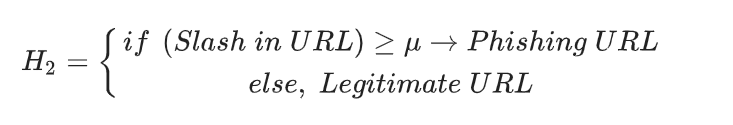

In [12]:
def count_slashes(url):
    return url.count('/')

dataset["numb of slashes"] = dataset["url"].apply(count_slashes)

### Heuristics 3: dots in host name of the URL

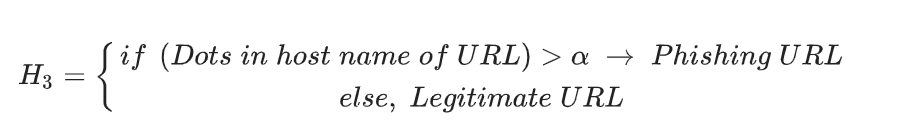

In [13]:
def count_dots_in_host(url):
    parsed_url = urlparse(url)
    host_name = parsed_url.netloc
    return host_name.count('.')

dataset["numb of dots host"] = dataset["url"].apply(count_dots_in_host)

### Heuristics 4: number of terms in the host name of the URL

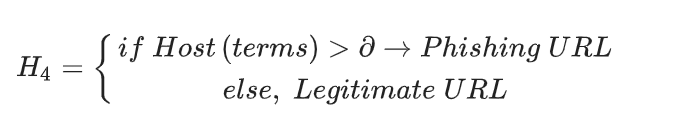

In [14]:
def count_host_terms(url):
    parsed_url = urlparse(url)
    host_name = parsed_url.netloc
    return len(host_name.split('.'))

dataset["numb of host terms"] = dataset["url"].apply(count_host_terms)

### Heuristics 5: special characters

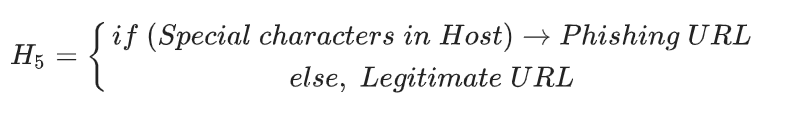

In [15]:
def has_special_characters(url):
    special_characters = set(string.punctuation.replace('/', '').replace('.', '').replace("-", ""))
    for char in url:
        if char in special_characters:
            return 1
    return 0

dataset["has specialChar"] = dataset["url"].apply(has_special_characters)

### Heuristic 6: IP address

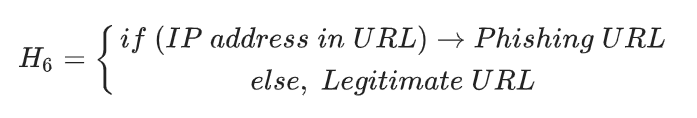

In [16]:
def has_ip_address(url):
    ip_pattern = r"\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b|\b(?:[0-9a-fA-F]{1,4}:){7}[0-9a-fA-F]{1,4}\b"
    return int(bool(re.search(ip_pattern, url)))

dataset["has Ip Addr"] = dataset["url"].apply(has_ip_address)

### Heuristics 7: unicode in URL

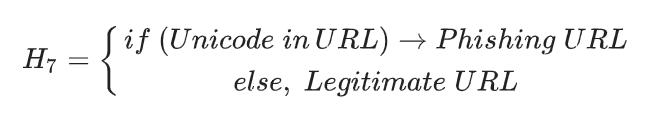

In [17]:
def has_unicode(url):
    for char in url:
        if ord(char) > 127:
            return 1
    return 0

dataset["has unicode"] = dataset["url"].apply(has_unicode)

### Heuristics 8: transport layer security

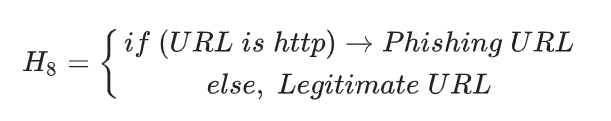

In [18]:
def has_http(url):
    return int("http" in url)

dataset["has http"] = dataset["url"].apply(has_http)

### Heuristics 9: Subdomain

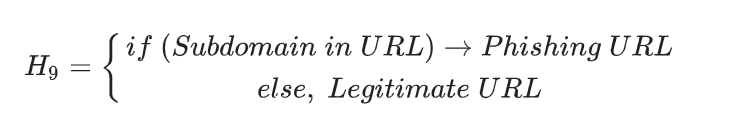

In [19]:
def has_subdomain(url):
    parsed_url = urlparse(url)
    if parsed_url.hostname:
        parts = parsed_url.hostname.split('.')
        return int(len(parts) > 2)
    return 0

dataset["has subdomain"] = dataset["url"].apply(has_subdomain)

### Heuristics 10: top level domain

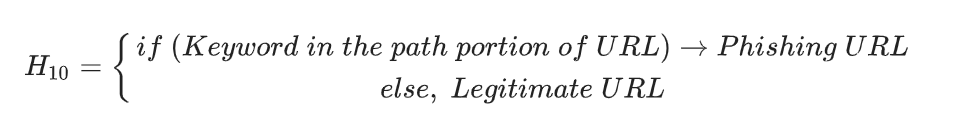

In [20]:
def tld_exists(url):
    parsed_url = urlparse(url)
    if parsed_url.hostname:
        parts = parsed_url.hostname.split('.')
        if len(parts) > 1:
            tld = parts[-1]
            recognized_tlds = {'com', 'net', 'org', 'edu', 'gov'}
            return int(tld.lower() in recognized_tlds)
    return 0

dataset["TLD valid"] = dataset["url"].apply(tld_exists)

### Heuristics 11: number of dots in the path of the URL

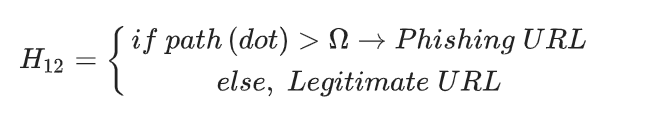

In [21]:
def count_dots_in_path(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    return path.count('.')

dataset["numb of dots path"] = dataset["url"].apply(count_dots_in_path)

### Heuristics 12: hyphen in the host name of the URL

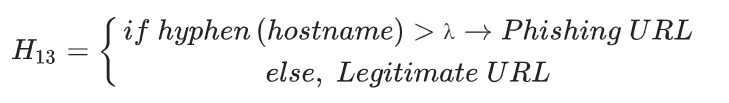

In [22]:
def count_hyphens_in_host(url):
    parsed_url = urlparse(url)
    host = parsed_url.hostname
    if host:
        return host.count('-')
    else:
        return 0

dataset["numb of hyphens in host"] = dataset["url"].apply(count_hyphens_in_host)

### Heuristics 13: URL length

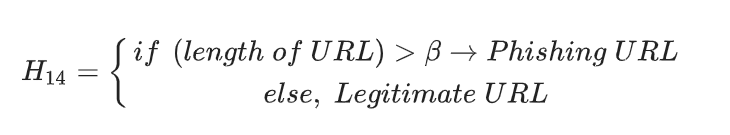

In [23]:
def url_length(url):
    return len(url)

dataset["URL length"] = dataset["url"].apply(url_length)

Our dataset now become :

In [24]:
dataset.head()

,url,type,host length,numb of slashes,numb of dots host,numb of host terms,has specialChar,has Ip Addr,has unicode,has http,has subdomain,TLD valid,numb of dots path,numb of hyphens in host,URL length
0,br-icloud.com.br,phishing,0,0,0,1,0,0,0,0,0,0,2,0,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,0,1,1,0,0,0,0,0,2,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,3,0,1,0,0,0,0,0,0,2,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,21,3,2,3,1,0,0,1,1,0,1,1,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,23,3,1,2,1,0,0,1,0,1,1,1,235


Adding the *target* column :

In [25]:
def target(t):
  if t == "benign":
    return 0
  else:
    return 1

dataset["target"] = dataset["type"].apply(target)

Dropping the *URL* and the *type* columns :

In [26]:
dataset.drop(columns=["url", "type"], inplace=True)

dataset.head()

,host length,numb of slashes,numb of dots host,numb of host terms,has specialChar,has Ip Addr,has unicode,has http,has subdomain,TLD valid,numb of dots path,numb of hyphens in host,URL length,target
0,0,0,0,1,0,0,0,0,0,0,2,0,16,1
1,0,2,0,1,1,0,0,0,0,0,2,0,35,0
2,0,3,0,1,0,0,0,0,0,0,2,0,31,0
3,21,3,2,3,1,0,0,1,1,0,1,1,88,1
4,23,3,1,2,1,0,0,1,0,1,1,1,235,1


Checking if there's a column that has only unique value :

In [27]:
cols = dataset[:-1].columns

with open("../dataset/feed.txt", "w") as file:
    for col in cols:
        counts = dataset[col].value_counts()
        file.write(f"Column: {col}\n")
        file.write(counts.to_string())
        file.write("\n\n")

After checking the result.txt, there's no feature that has only unique value.

## IV - Data preprocessing :

Importing the necessary libraries:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Extracting the features and the target:

In [29]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

Splitting our dataset into a training set and a test set:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scalling our features :

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## V - The model :

Importing the necessary libraries:

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

Our model is a neural network model using the **Keras API** with **four dense layers**. The model architecture consists of an input layer with 13 neurons, followed by three hidden layers with 125, 35, and 12 neurons respectively, all using the **ReLU activation** function. The output layer consists of a single neuron with a s**igmoid activation** function. our model is compiled using the **Adam optimizer** and **binary cross-entropy loss** function.

In [33]:
model = Sequential([
    Dense(125, activation='relu', input_shape=(13,)),
    Dense(35, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               1750      
                                                                 
 dense_1 (Dense)             (None, 35)                4410      
                                                                 
 dense_2 (Dense)             (None, 12)                432       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 6605 (25.80 KB)
Trainable params: 6605 (25.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## VI - Training the model :

In [34]:
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

Epoch 1/15


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16280/16280 [==============================] - 43s 3ms/step - loss: 0.2266 - accuracy: 0.9047
Epoch 2/15
16280/16280 [==============================] - 39s 2ms/step - loss: 0.1813 - accuracy: 0.9241
Epoch 3/15
16280/16280 [==============================] - 38s 2ms/step - loss: 0.1765 - accuracy: 0.9266
Epoch 4/15
16280/16280 [==============================] - 38s 2ms/step - loss: 0.1740 - accuracy: 0.9281
Epoch 5/15
16280/16280 [==============================] - 57s 3ms/step - loss: 0.1721 - accuracy: 0.9290
Epoch 6/15
16280/16280 [==============================] - 55s 3ms/step - loss: 0.1706 - accuracy: 0.9297
Epoch 7/15
16280/16280 [==============================] - 51s 3ms/step - loss: 0.1695 - accuracy: 0.9302
Epoch 8/15
16280/16280 [==============================] - 43s 3ms/step - loss: 0.1686 - accuracy: 0.9306
Epoch 9/15
16280/16280 [==============================] - 44s 3ms/step - loss: 0.1678 - accuracy: 0.9310
Epoch 10/15
16280/16280 [==============================] - 44s 3ms

## VII - Evaluation :

Importing the necessary libraries:

In [35]:
from sklearn.metrics import (confusion_matrix, classification_report)

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

4070/4070 [==============================] - 10s 2ms/step - loss: 0.1651 - accuracy: 0.9316


0.9315642714500427

In [37]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

y_pred[:5]

4070/4070 [==============================] - 8s 2ms/step


array([[1],
       [0],
       [1],
       [1],
       [0]])

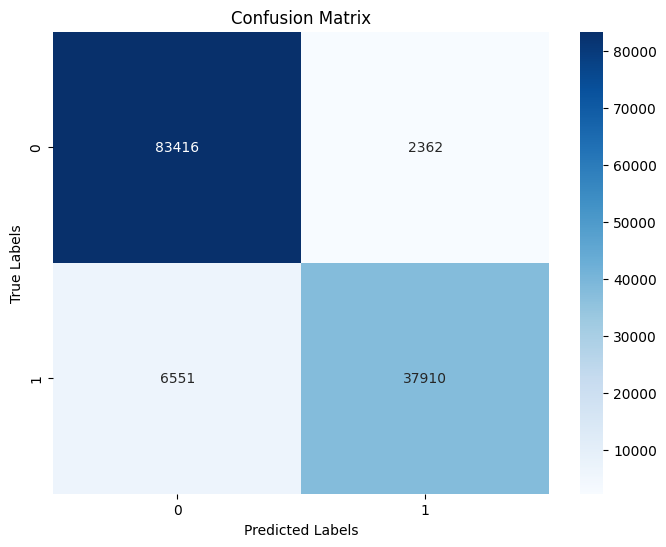

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     85778
           1       0.94      0.85      0.89     44461

    accuracy                           0.93    130239
   macro avg       0.93      0.91      0.92    130239
weighted avg       0.93      0.93      0.93    130239



In [40]:
import pickle
# from tensorflow.keras.models import load_model

# Sauvegarder le modèle et le scaler
model.save('url.h5')

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
